<a href="https://colab.research.google.com/github/zisx96/heart-disease-P/blob/main/heartprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediciton**

# **Introduction-**

The diagnosis of heart disease is usually based on signs, symptoms and physical examination of the patient. There are several factors that increase the risk of heart disease, such as smoking habit, body cholesterol level, family history of heart disease, obesity, high blood pressure, and lack of physical exercise.

Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

Our objective in this health problem is to identify patients with a heart disease.

This project predicts people with cardiovascular disease by extracting the patient medical history that leads to a fatal heart disease from a dataset that includes patients' medical history such as chest pain, sugar level, blood pressure, etc.


# **Attribute Information:**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient   
   has hypertension. 
5. stroke: 0 if the patient doesn't have any heart stroke, 1 if the patient
   has a stroke.
6. chest_pain: 0 if the patient doesn't have chest pain, 1 if the patient has 
   a chest pain.
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or
   "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. heart_disease: 1 if the patient had a heart disease or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patien




# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ml/datasets/heart.csv')
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,NaN,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.4,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,0


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   stroke             5110 non-null   int64  
 5   chest_pain         5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  heart_disease      5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,0.343836,106.147677,28.893237,0.020548
std,21161.721625,22.612647,0.296607,0.226063,0.475034,45.283560,7.854067,0.141879
min,67.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
stroke                 0
chest_pain             0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
heart_disease          0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'stroke', 'chest_pain',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'heart_disease'],
      dtype='object')

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
stroke               0
chest_pain           0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
heart_disease        0
dtype: int64

In [11]:
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0


 **EDA (Exploratory Data Analysis)**

 EDA is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

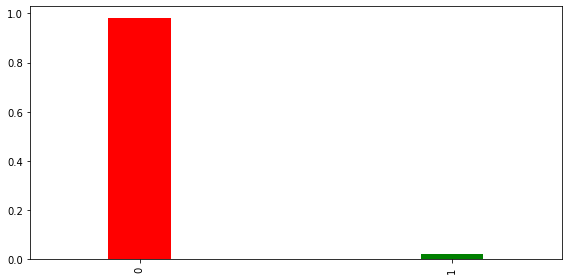

In [12]:
fig, axes = plt.subplots(figsize=(8, 4))
df['heart_disease'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   stroke             5110 non-null   int64  
 5   chest_pain         5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  heart_disease      5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [14]:
cols = df[['age', 'hypertension', 'stroke','chest_pain','avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi
0,67.0,0,1,0,228.69,36.600000
1,61.0,0,0,0,202.21,28.893237
2,80.0,0,1,0,105.92,32.500000
3,49.0,0,0,0,171.23,34.400000
4,79.0,1,0,0,174.12,24.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

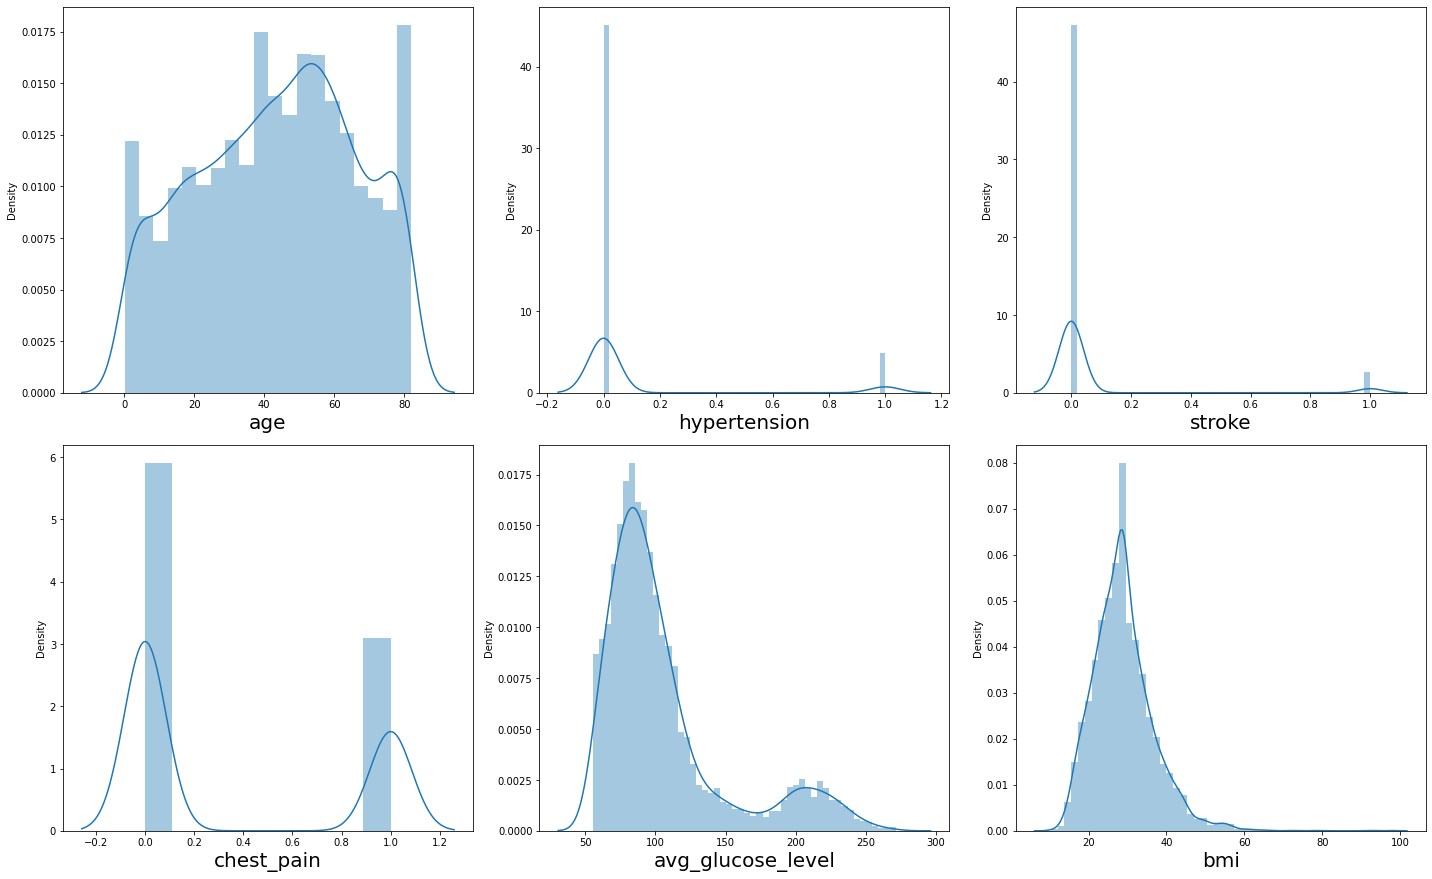

In [15]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

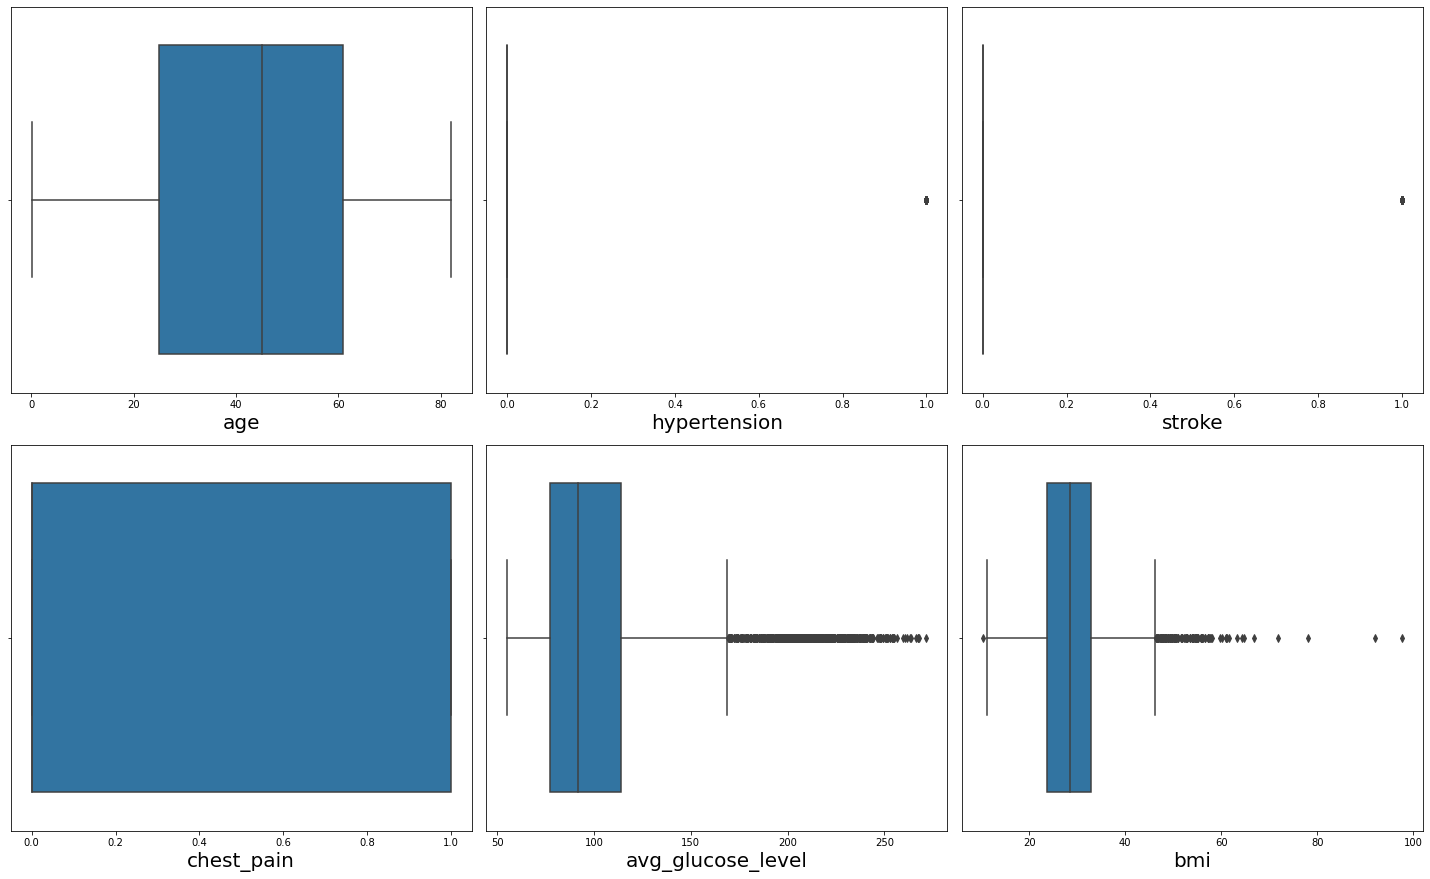

In [16]:
# lets see outliers
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

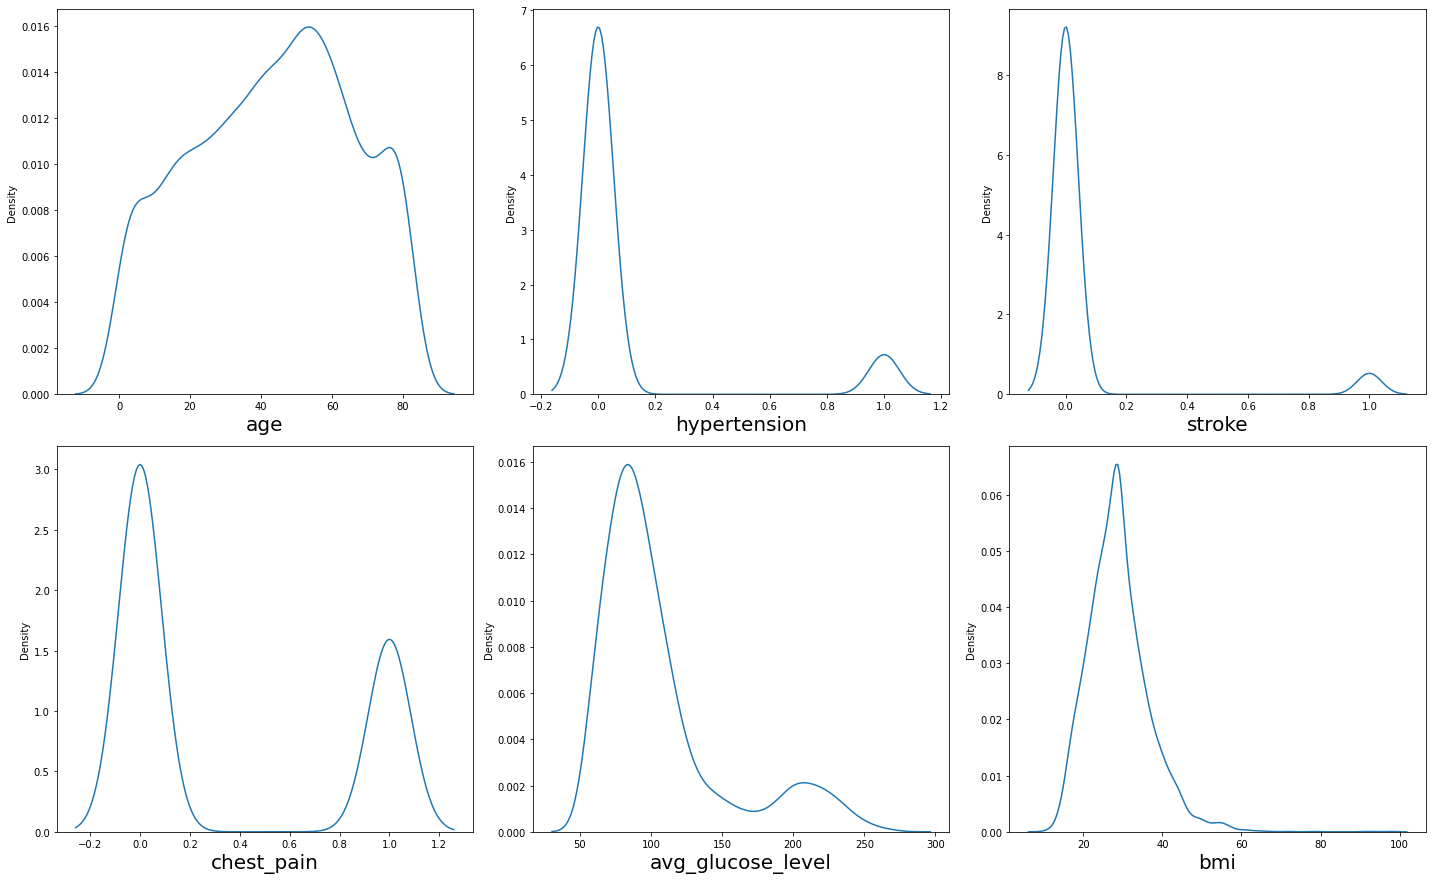

In [17]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Categorical Columns

In [18]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


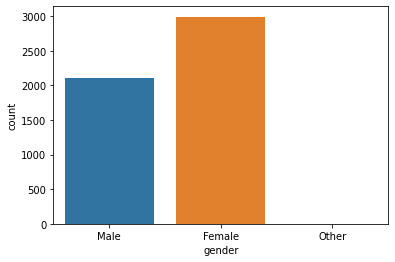

In [19]:
import seaborn as sns
sns.countplot(df['gender'])

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'stroke', 'chest_pain',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'heart_disease'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


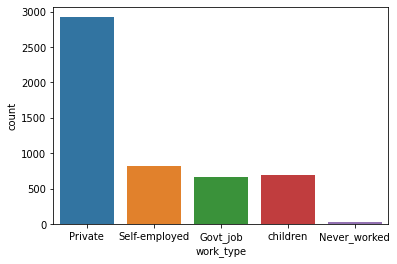

In [21]:
sns.countplot(df['work_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


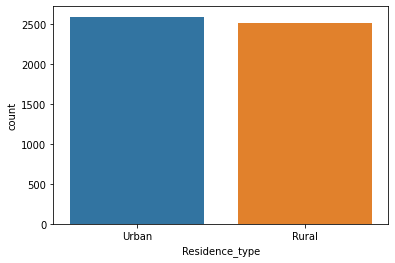

In [22]:
sns.countplot(df['Residence_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


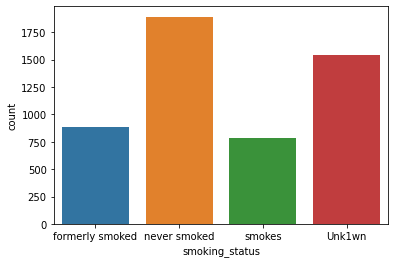

In [23]:
sns.countplot(df['smoking_status'])

In [24]:
# relation between categorical column and target columns

In [25]:
categorical_features = ['gender', 'work_type', 'Residence_type','smoking_status']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

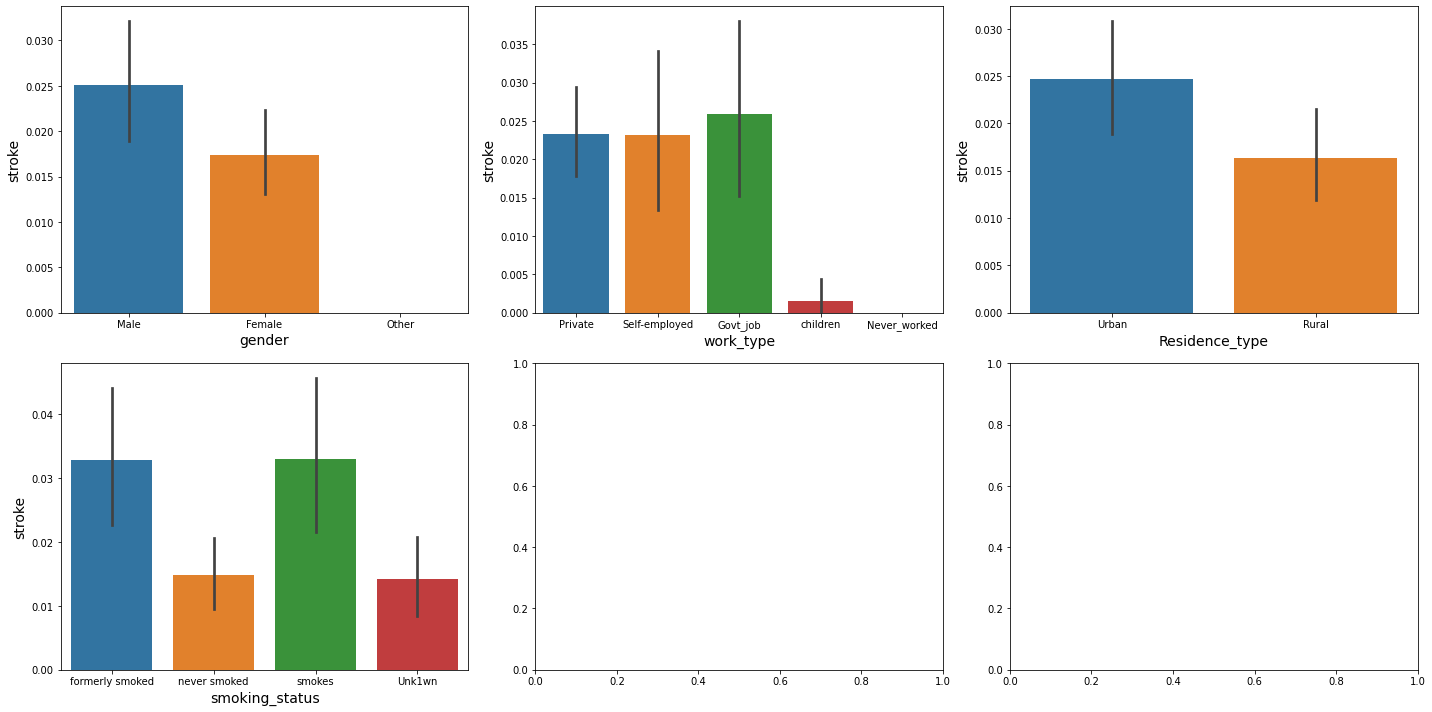

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'heart_disease'

for i, c in enumerate(categorical_features):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

In [27]:
# pandas profiling
from pandas_profiling import ProfileReport

In [28]:
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0


**Handle Categorical Columns**

In [29]:
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0


In [30]:
df['smoking_status'].value_counts()

never smoked       1892
Unk1wn             1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [31]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unk1wn'],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   stroke             5110 non-null   int64  
 5   chest_pain         5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  heart_disease      5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [33]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [34]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male,gender_Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [35]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [36]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [37]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [38]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [39]:
data = pd.concat([df, gender, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,...,1,0,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,28.893237,...,0,0,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,...,1,0,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,...,0,0,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,...,0,0,0,0,1,0,0,0,1,0


In [40]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,id,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,0,228.69,36.600000,1,1,0,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,0,202.21,28.893237,0,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,0,171.23,34.400000,0,0,0,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,0,174.12,24.000000,0,0,0,0,0,1,0,0,0,1,0


In [41]:
data = data.drop(columns="id" , axis=1)
data.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,0,0,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,28.893237,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,0,0,1,0,0,0,1,0


In [42]:
data.columns

Index(['age', 'hypertension', 'stroke', 'chest_pain', 'avg_glucose_level',
       'bmi', 'heart_disease', 'gender_Male', 'gender_Other',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [43]:
# Standardize the numerical features
# from sklearn.preprocessing import StandardScaler
# numerical_feature = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
# scaler = StandardScaler()
# scaler.fit(data[numerical_feature])

# data.loc[:, numerical_feature] = scaler.transform(data[numerical_feature])

In [44]:
data.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,0,0,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,28.893237,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,0,0,1,0,0,0,1,0


In [45]:
data.describe()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.343836,106.147677,28.893237,0.020548,0.413894,0.000196,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.141879,0.492578,0.013989,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,0.000000,91.885000,28.400000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Correalation between features and target


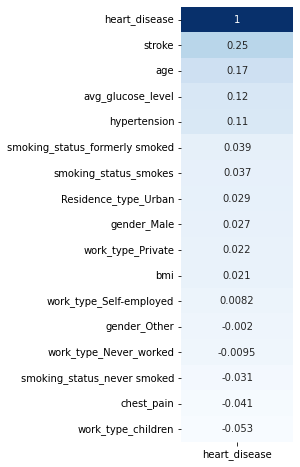

In [47]:
corr = data.corr()['heart_disease'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

# **Split dataset into train and test**

In [48]:
data.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,0,0,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,28.893237,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,0,0,1,0,0,0,1,0


In [49]:
x = data.drop("heart_disease", axis=1)
x.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,0,0,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,28.893237,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,0,1,0,0,0,1,0


In [50]:
y = data[['heart_disease']]
y.head()

,heart_disease
0,1
1,0
2,1
3,0
4,0


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [52]:
x

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
x_train

array([[ 0.34379639, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.47647849,  3.04319637, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
        -0.7667743 , -0.42731326],
       ...,
       [-1.86049566, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 1.62639008, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.12265954, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354]])

# **Model** **Training**

In [55]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
# accuracy
decision.score(x_test, y_test)

0.9608772969768821

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

<ipython-input-57-91513dc11b60>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [58]:
# accuracy
rf.score(x_test, y_test)

0.97628927089508

In [59]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [60]:
model.score(x_test,y_test)

0.97628927089508

In [61]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
kc.score(x_test,y_test)

0.975103734439834

In [63]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [64]:
lg.score(x_test,y_test)

0.97628927089508

In [65]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.981 total time=   0.5s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.2s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.972 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.977 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.980 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.968 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.972 total time=   0.8s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.978 total time=   0.2s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.2s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.971 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.974 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.978 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.966 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.972 total time=   0.3s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.974 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.972 total time=   0.1s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.971 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.974 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.978 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.966 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.972 total time=   0.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.959 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.971 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.978 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.969 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.971 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.972 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.981 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.981 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [66]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [67]:
from sklearn.svm import SVC
model = SVC(C= 0.1, gamma = 1, kernel = 'rbf')
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=1)

In [68]:
model.score(x_test,y_test)

0.97628927089508

In [69]:
prep = model.predict(x_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1647
           1       0.00      0.00      0.00        40

    accuracy                           0.98      1687
   macro avg       0.49      0.50      0.49      1687
weighted avg       0.95      0.98      0.96      1687



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Saving Model**

In [71]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)